In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palettable.colorbrewer.diverging import RdBu_8
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

In [47]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

indx = 7
print(file_list[indx])  
df_temp = pd.read_csv('./raw_data/'+file_list[indx])    

data_20190309_1405_2.csv


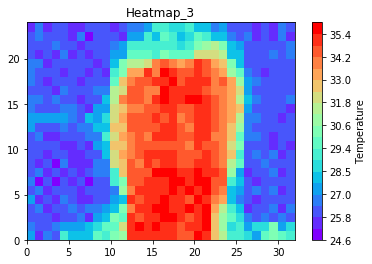

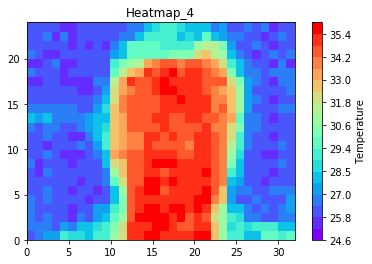

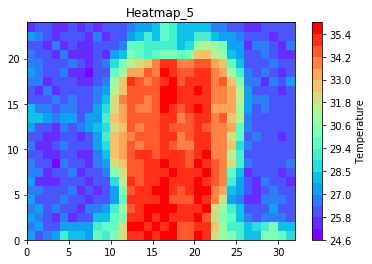

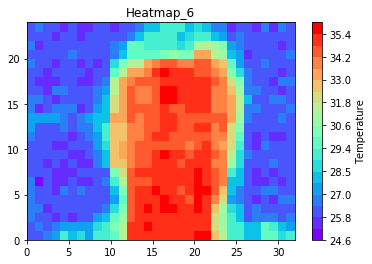

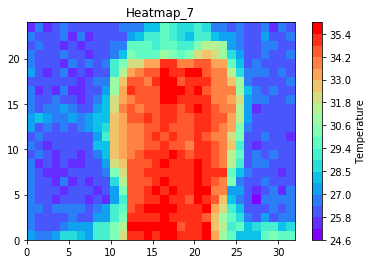

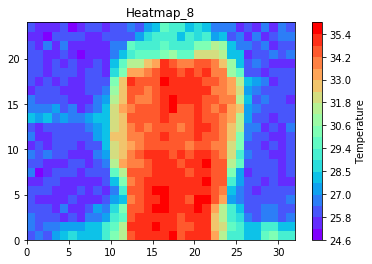

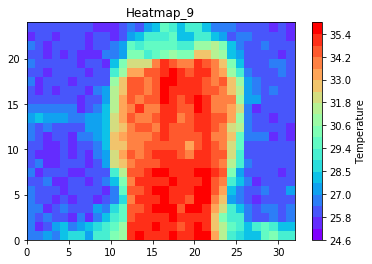

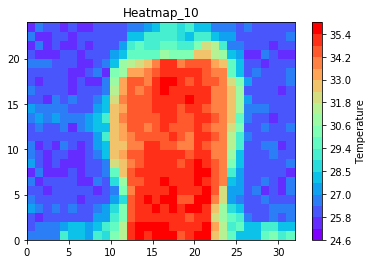

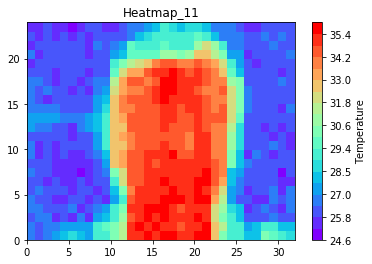

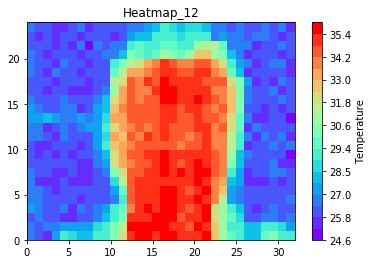

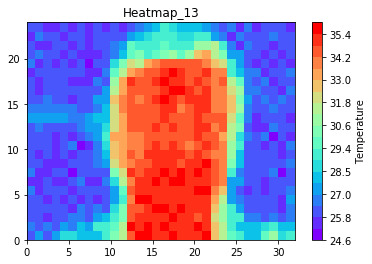

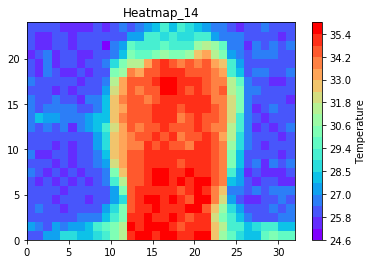

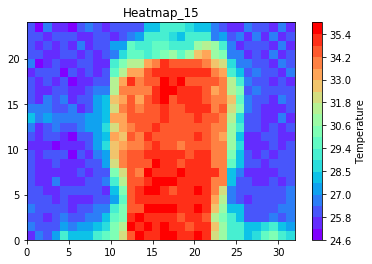

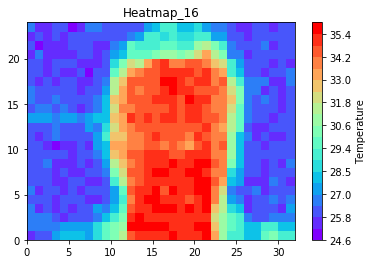

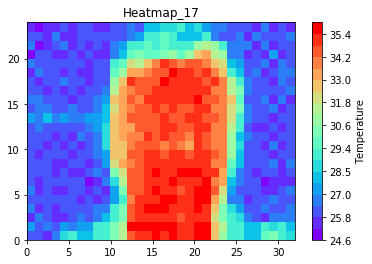

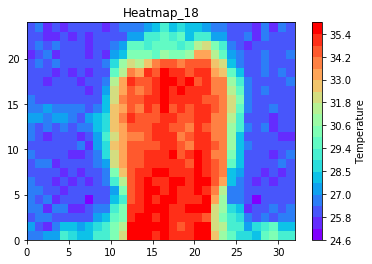

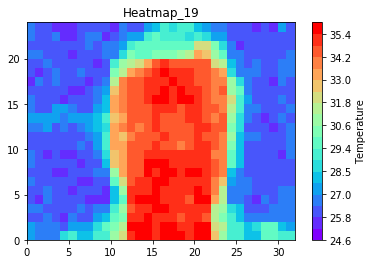

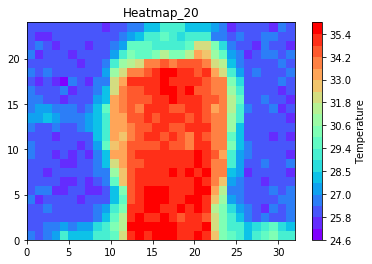

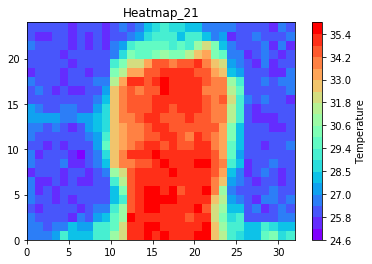

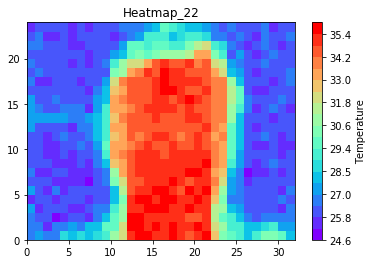

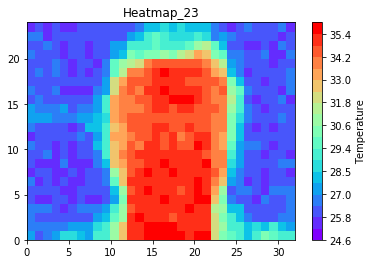

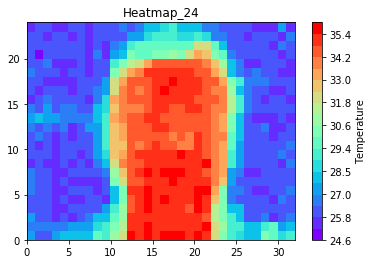

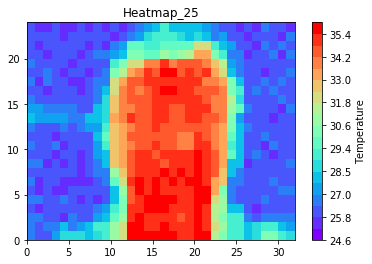

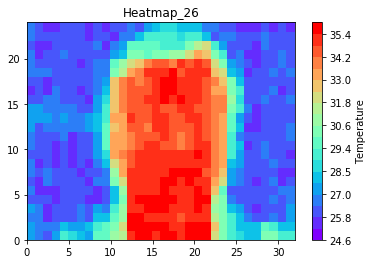

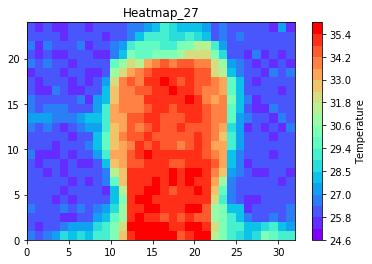

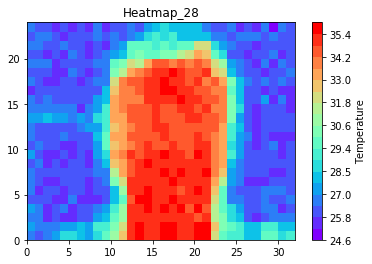

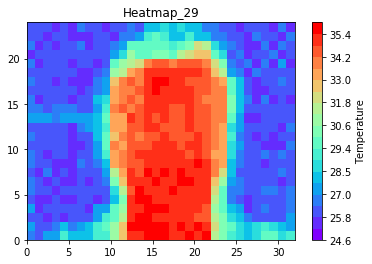

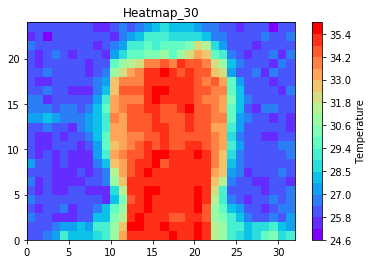

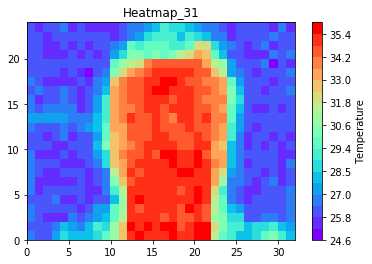

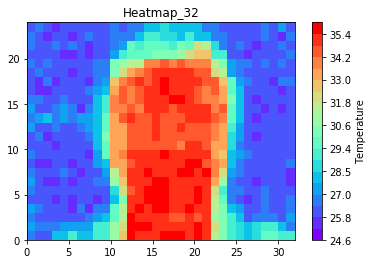

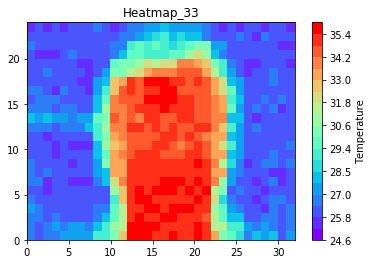

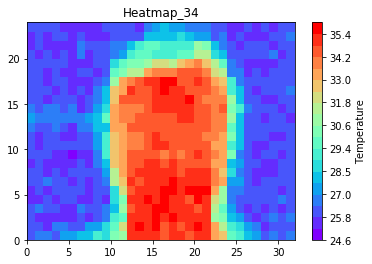

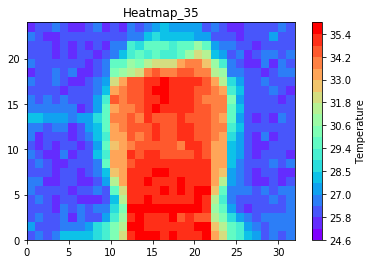

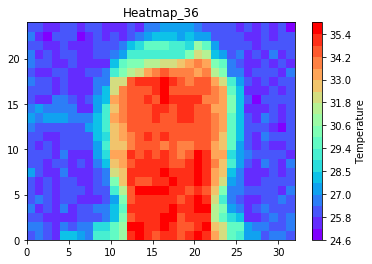

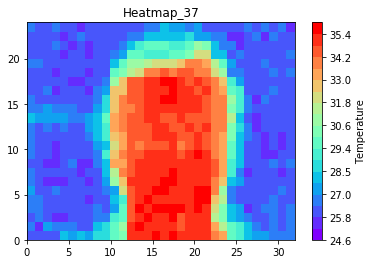

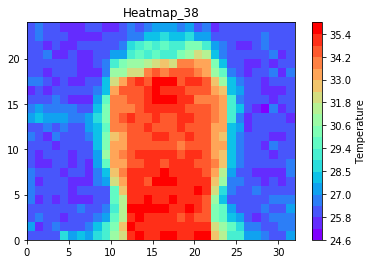

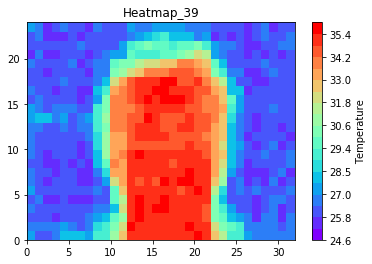

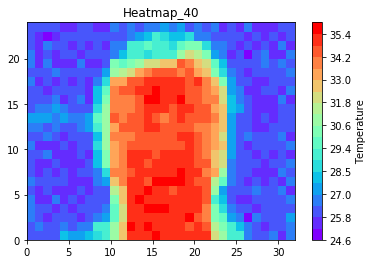

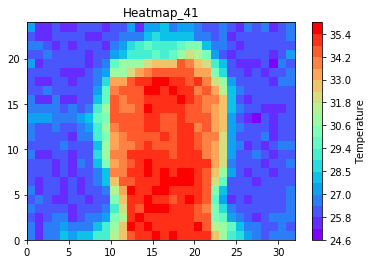

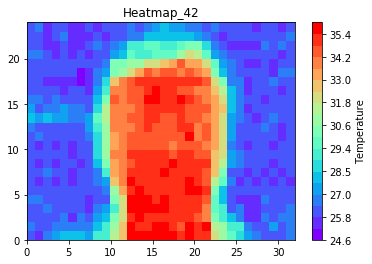

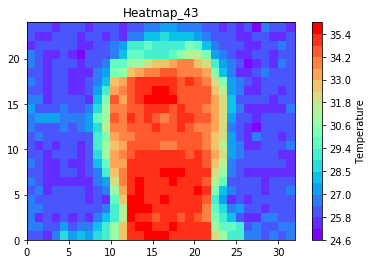

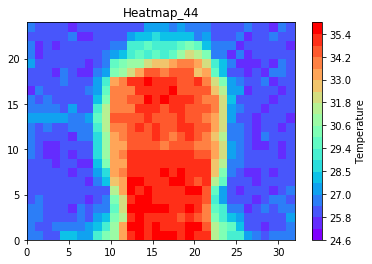

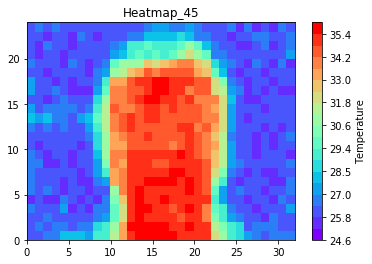

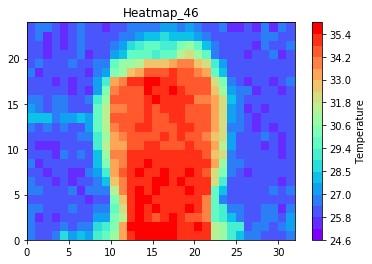

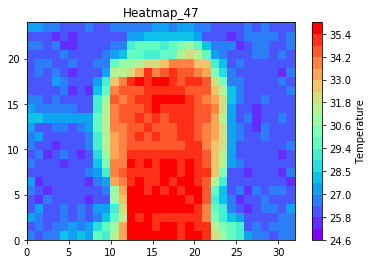

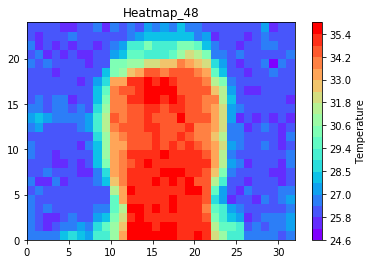

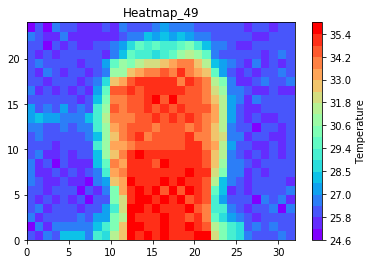

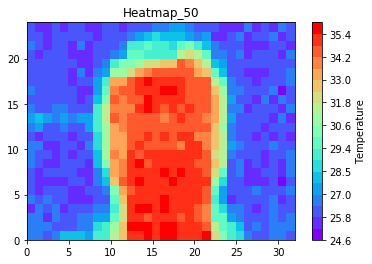

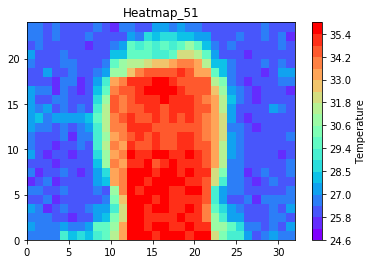

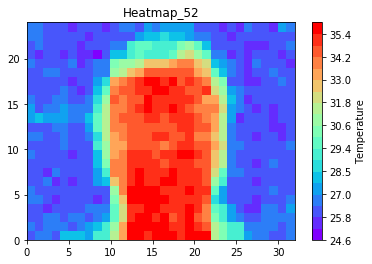

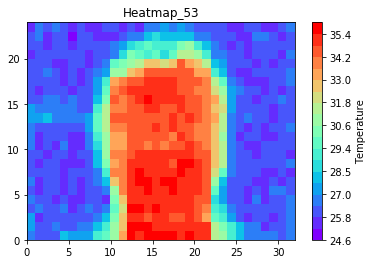

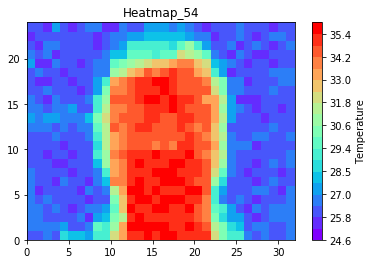

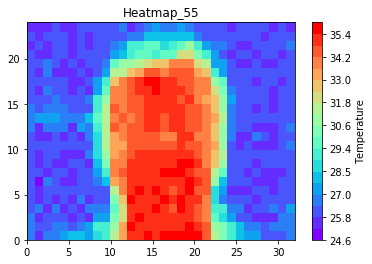

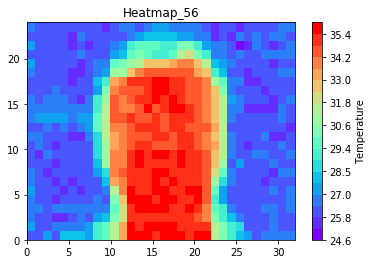

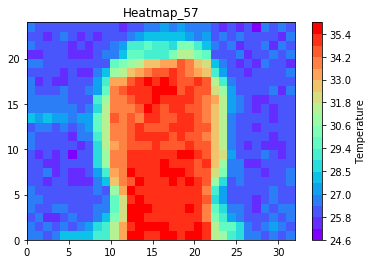

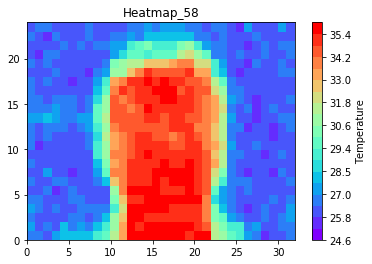

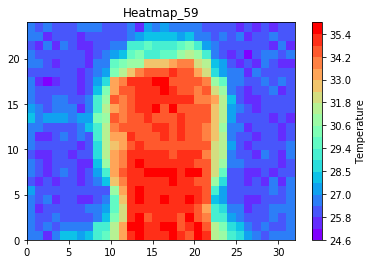

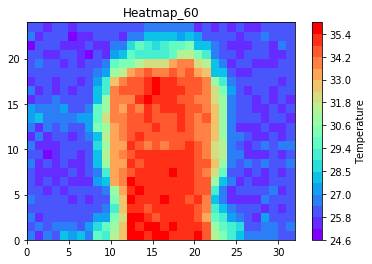

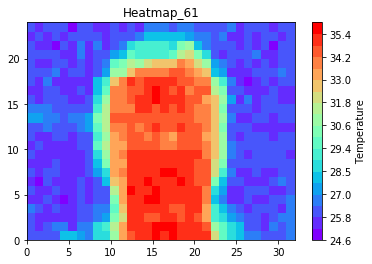

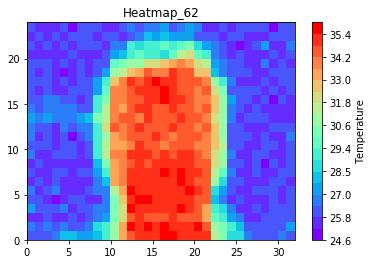

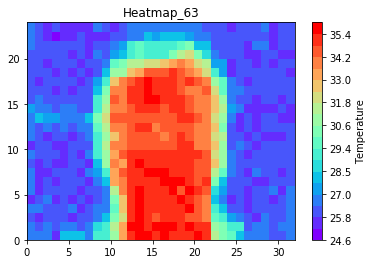

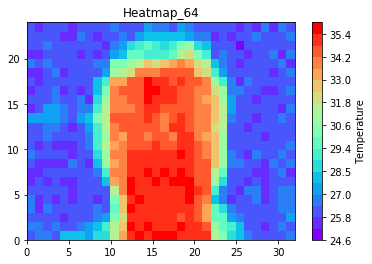

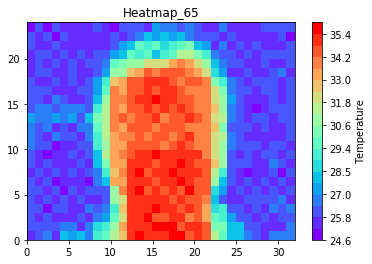

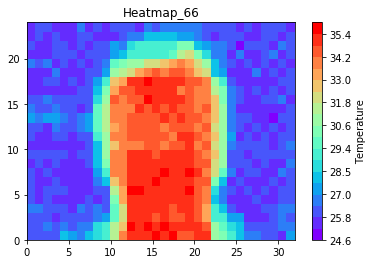

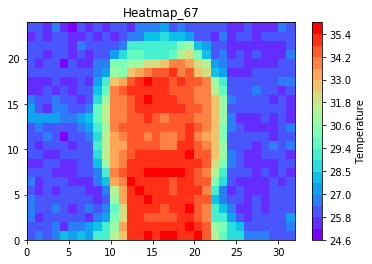

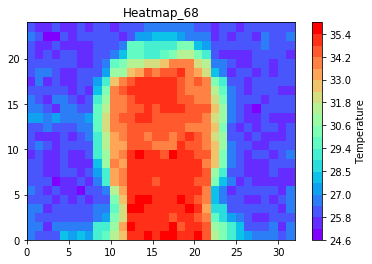

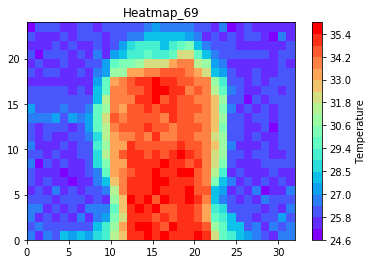

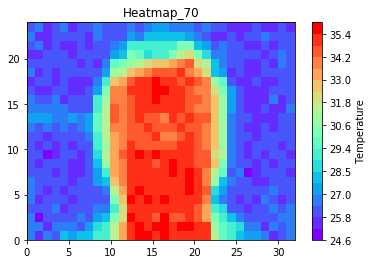

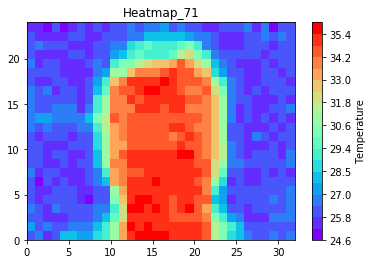

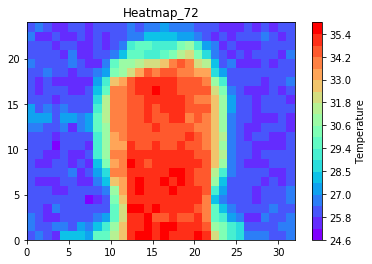

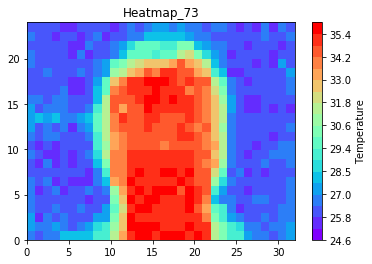

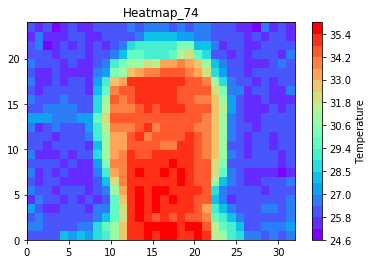

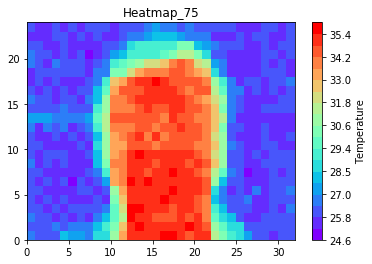

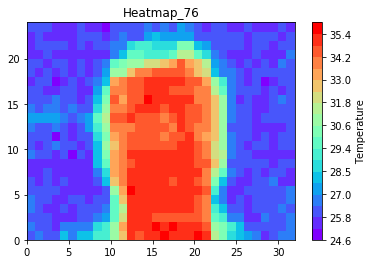

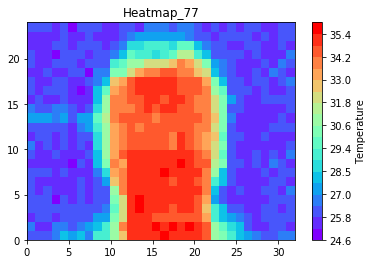

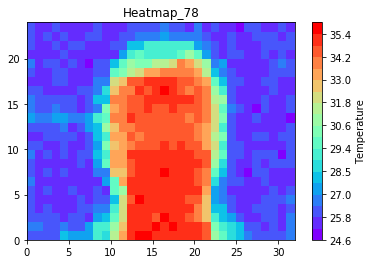

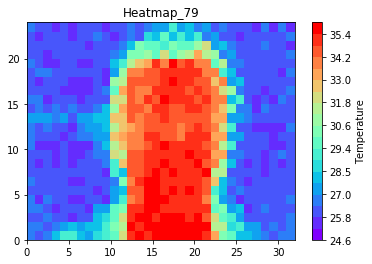

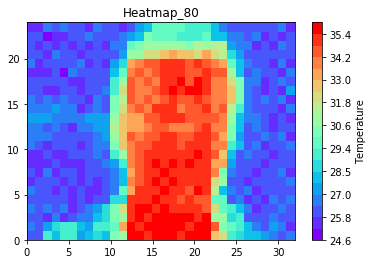

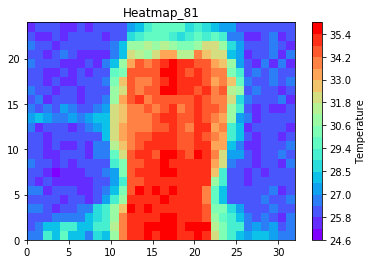

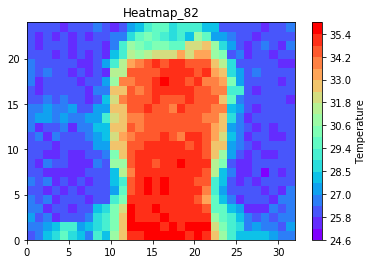

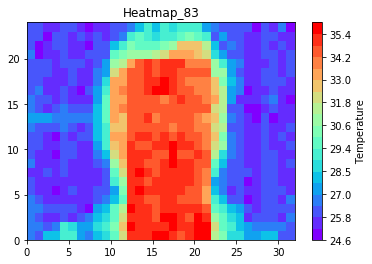

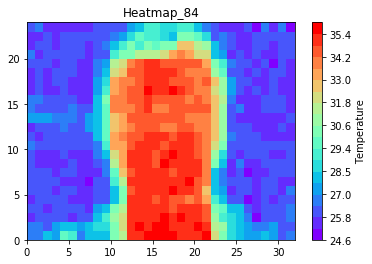

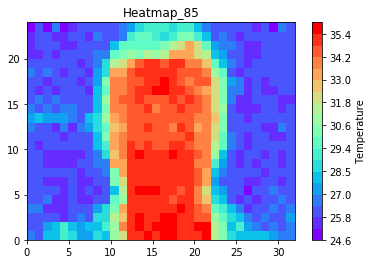

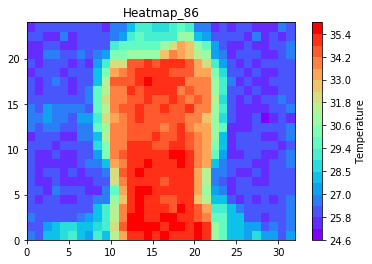

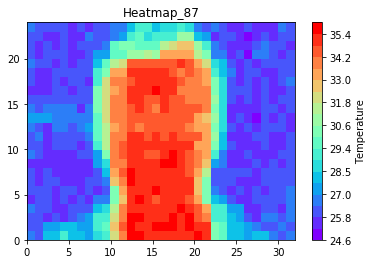

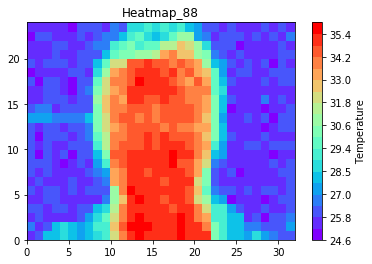

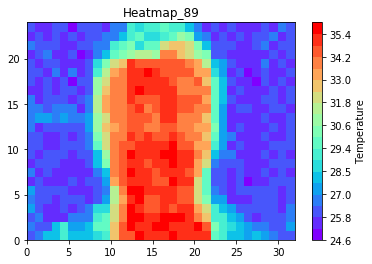

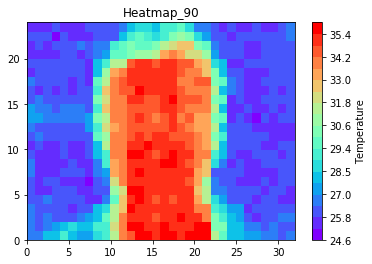

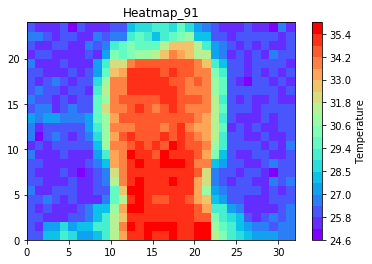

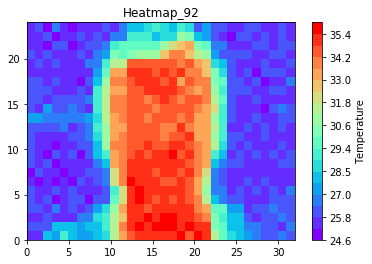

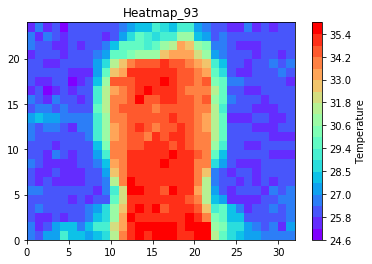

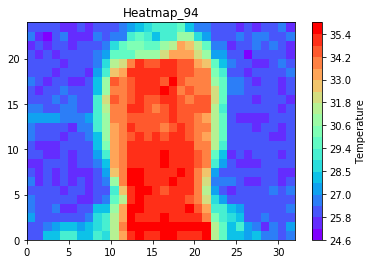

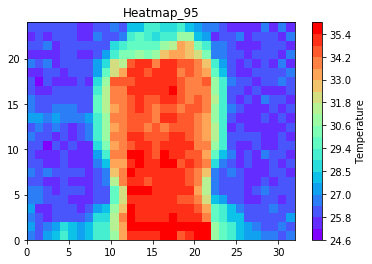

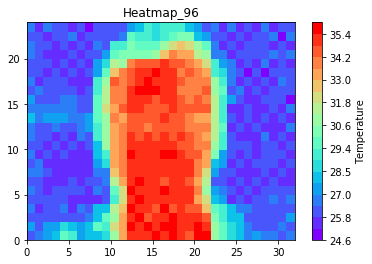

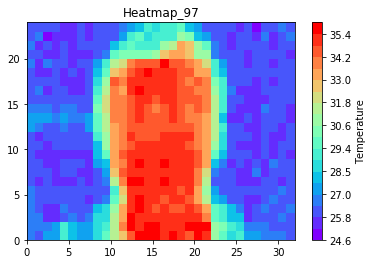

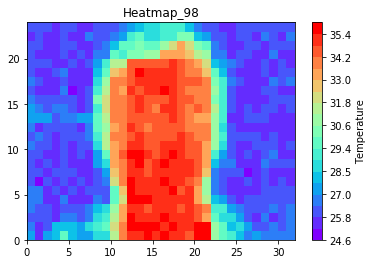

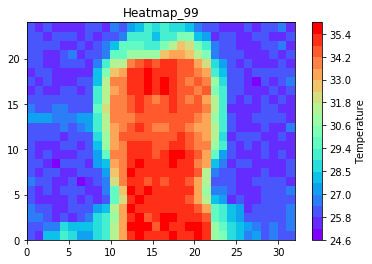

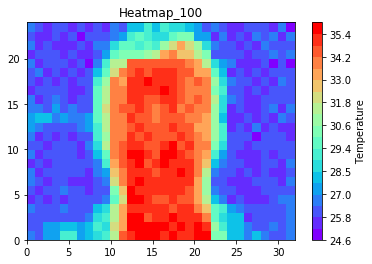

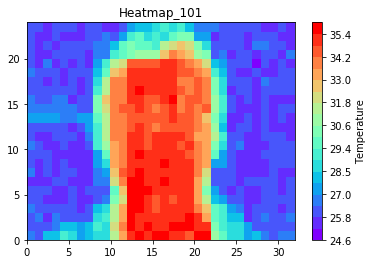

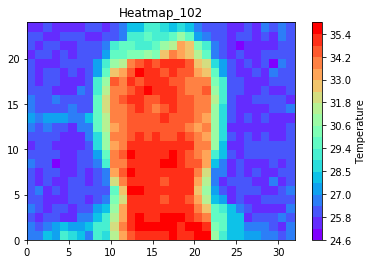

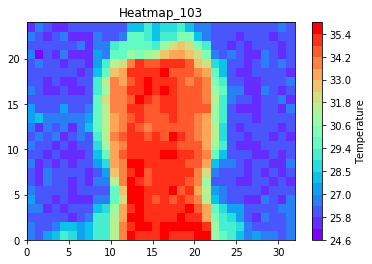

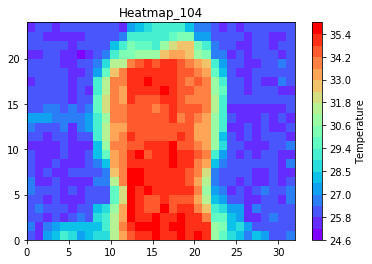

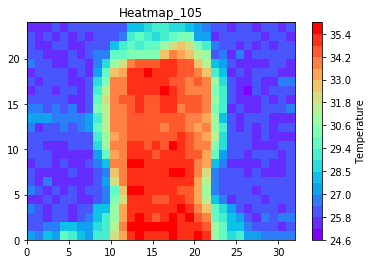

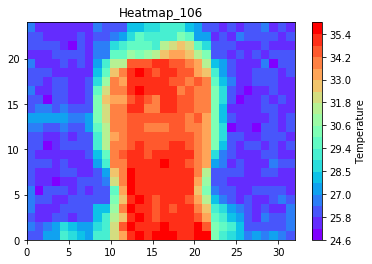

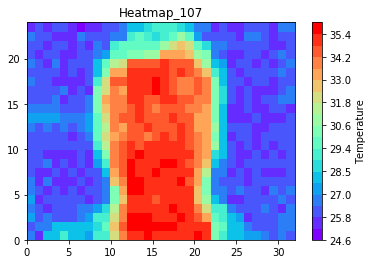

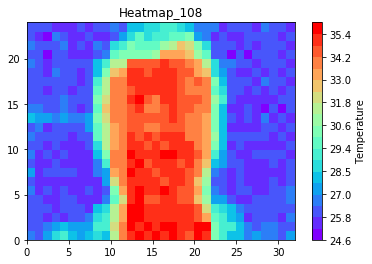

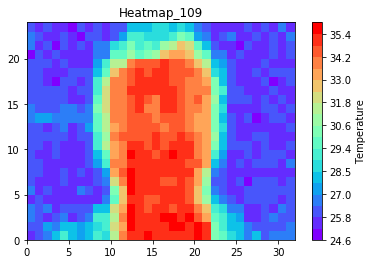

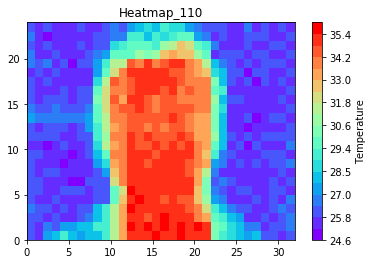

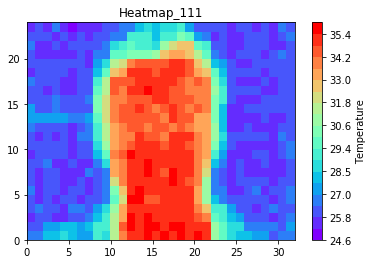

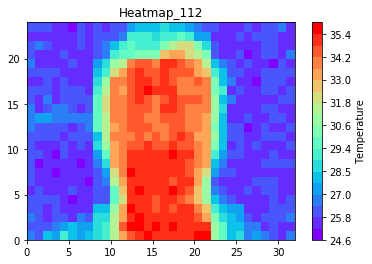

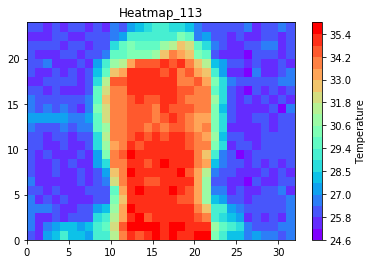

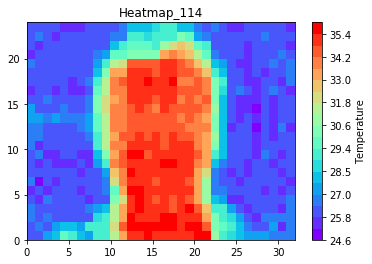

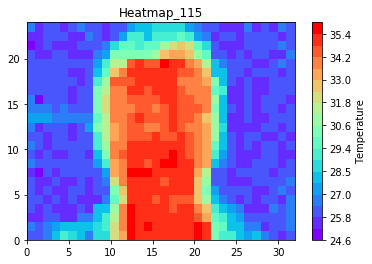

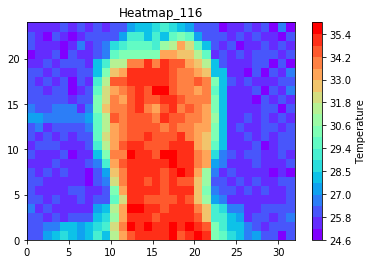

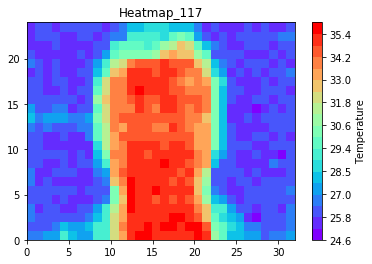

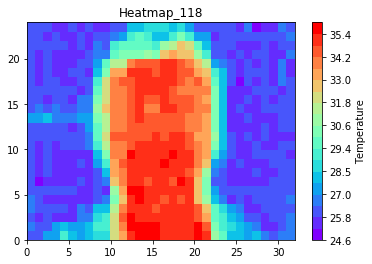

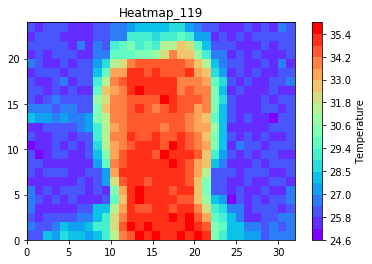

In [48]:
X, Y = np.meshgrid(np.linspace(0, 32, 33), np.linspace(0, 24, 25))
# tmp_all = np.zeros([24, 32])
p = 3
for l in range(df_temp.shape[0]):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24,先排列（从右到左），再排行（从下到上）
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1
            
    fig = plt.figure()
    ax0 = fig.add_subplot(1, 1, 1)
    cmap=plt.get_cmap('rainbow')
#     levels = MaxNLocator(nbins=p).tick_values(temperature0.min(), temperature0.max())  # 分成binb
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    c = ax0.pcolormesh(X, Y, temperature0, cmap=cmap, norm=norm)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('Heatmap_{}'.format(p))
    # plt.savefig("I:\graduation\论文\images\heatmap3.png", dpi=200)
    plt.show()
    p += 1

# 多帧求平均

In [44]:
levels = np.array([24.6, 25.2, 25.8, 26.4, 27. , 27.6, 28.5, 28.8, 29.4, 30. , 30.6,
       31.2, 31.8, 32.4, 33. , 33.6, 34.2, 34.8, 35.4, 36. ])

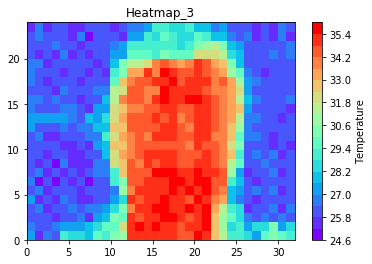

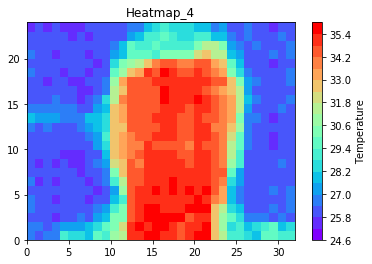

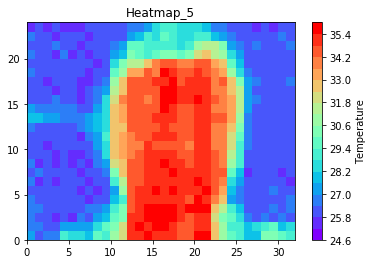

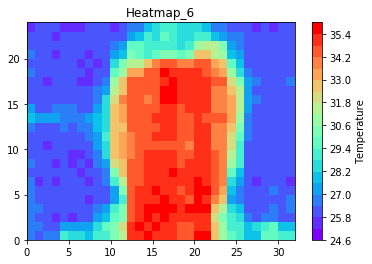

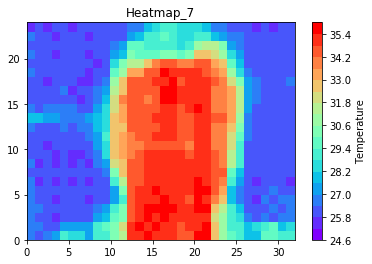

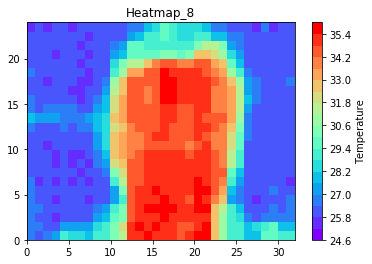

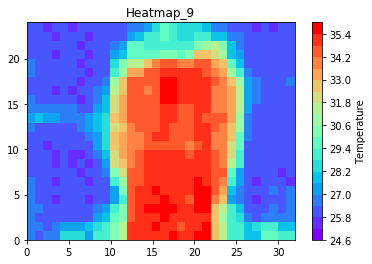

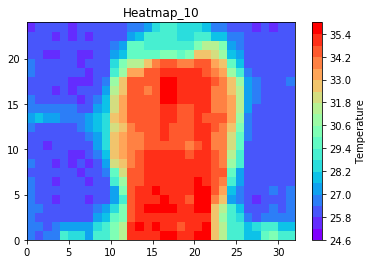

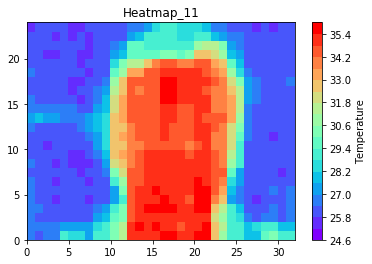

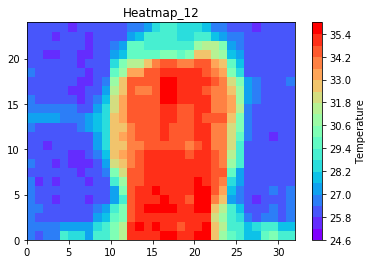

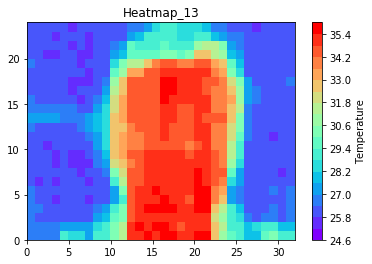

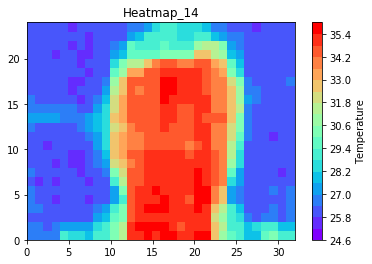

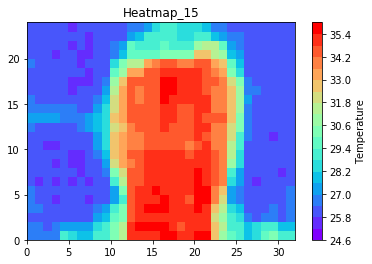

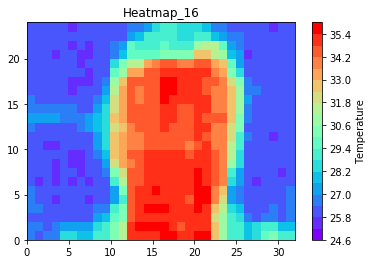

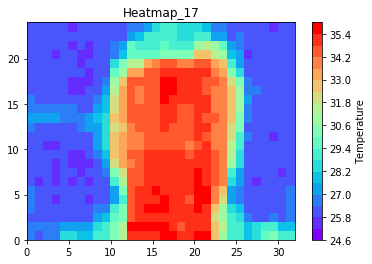

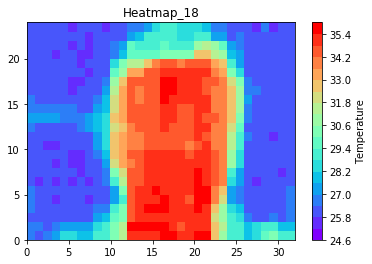

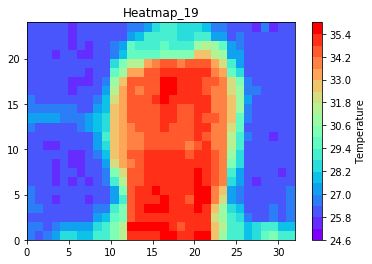

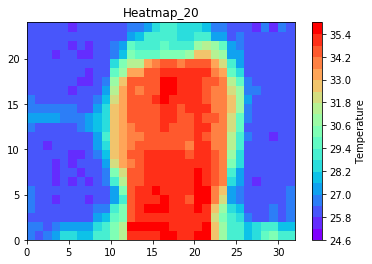

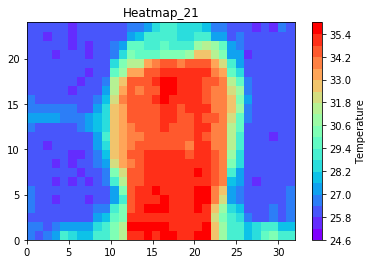

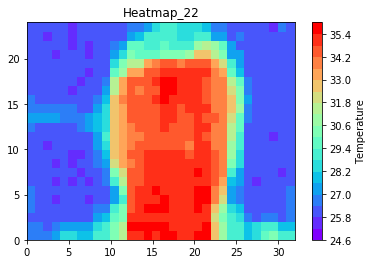

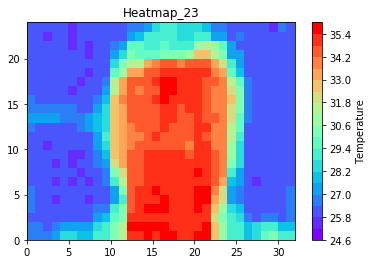

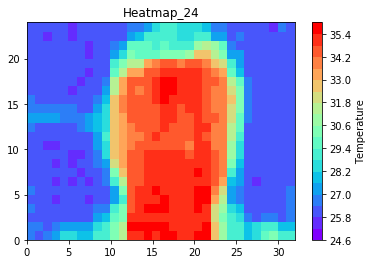

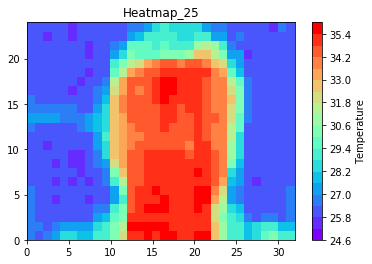

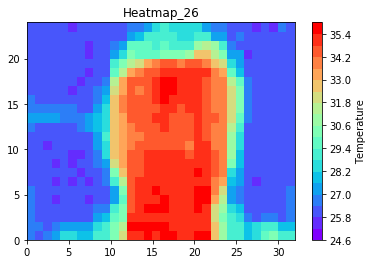

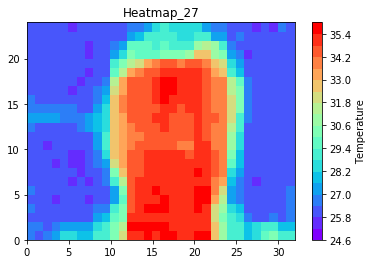

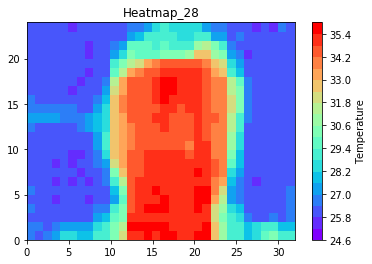

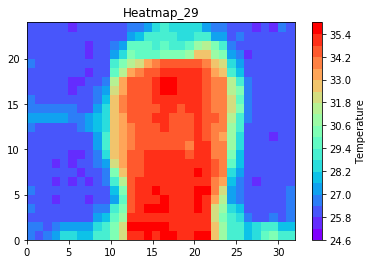

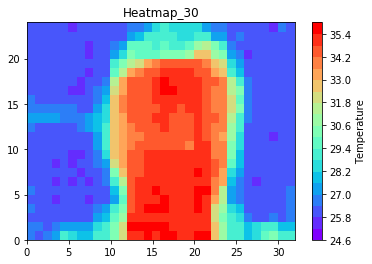

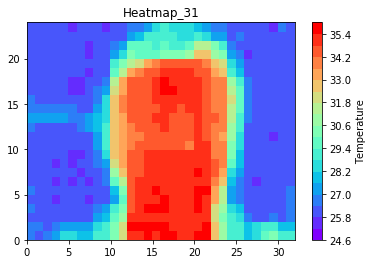

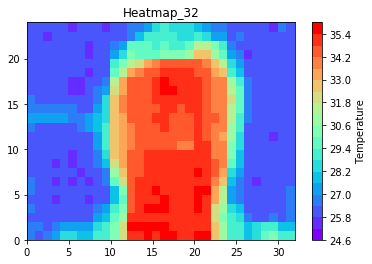

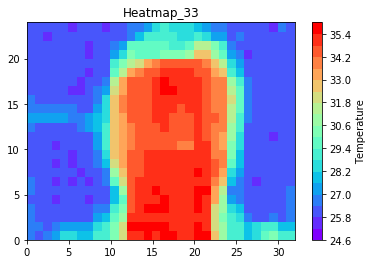

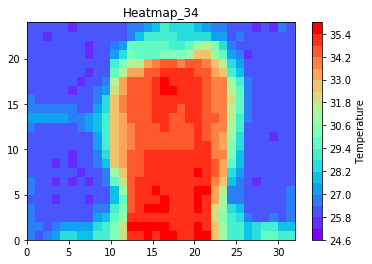

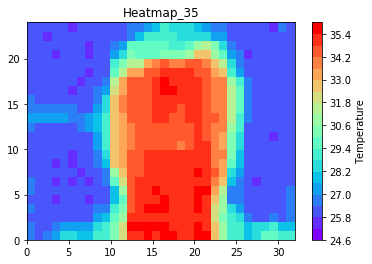

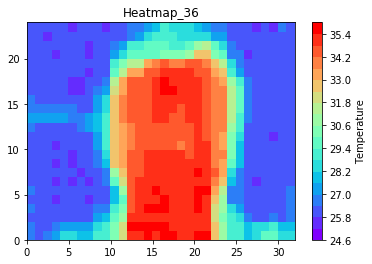

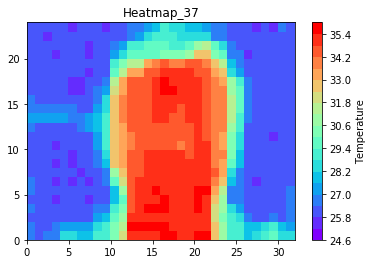

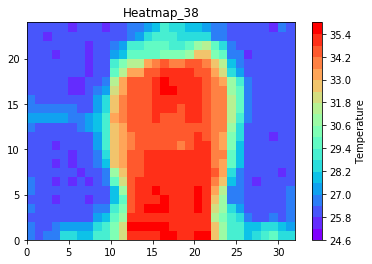

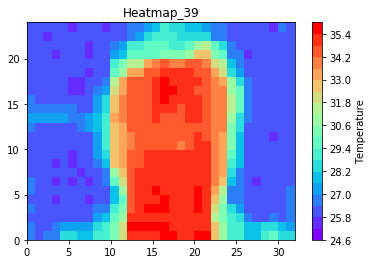

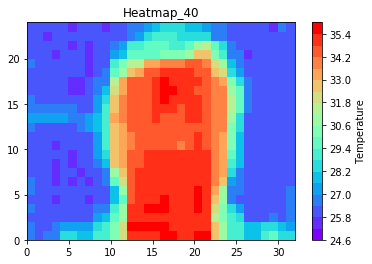

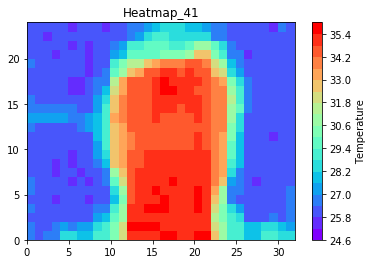

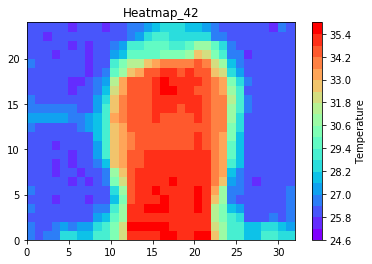

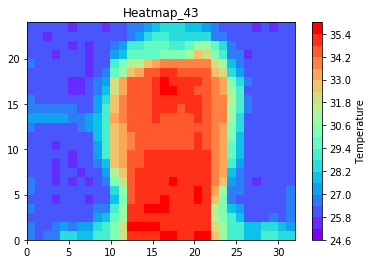

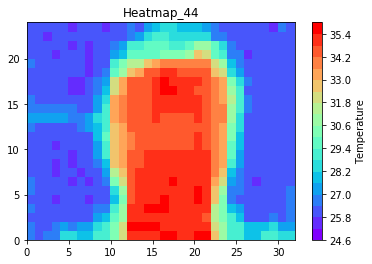

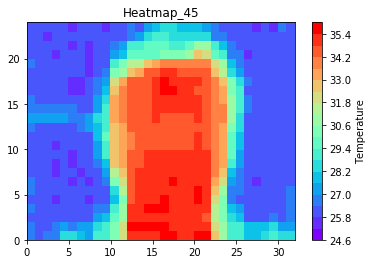

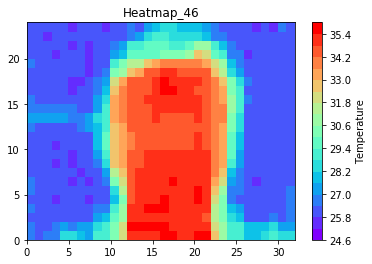

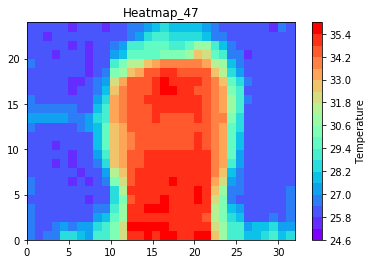

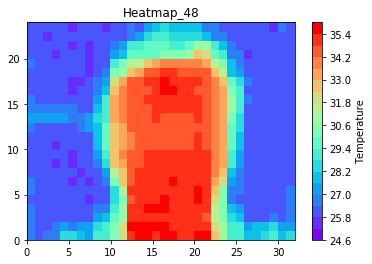

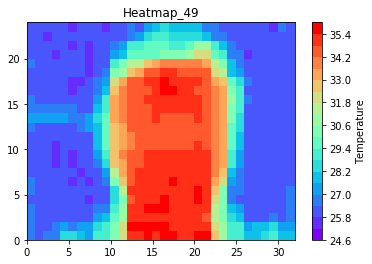

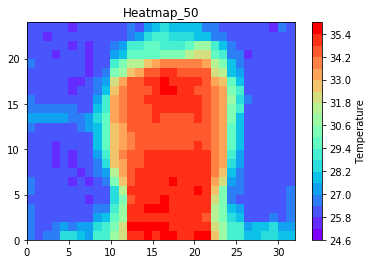

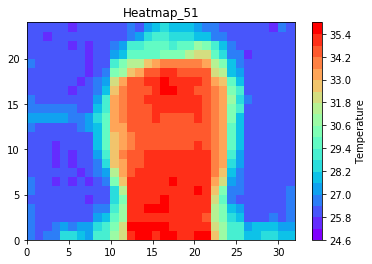

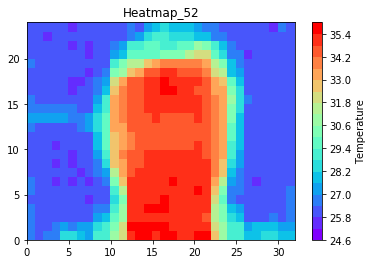

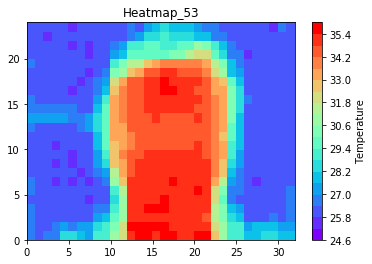

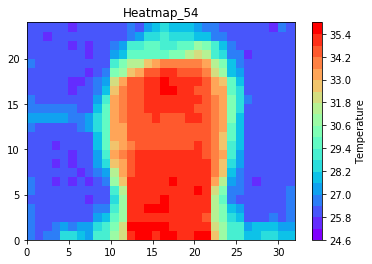

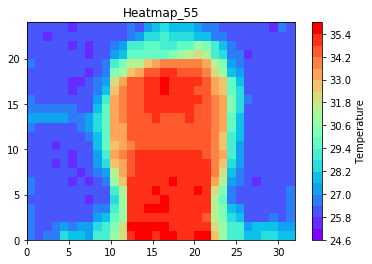

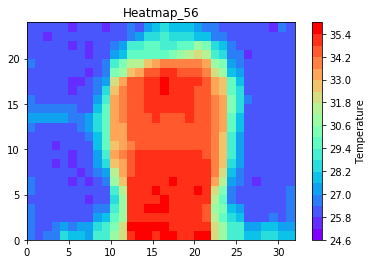

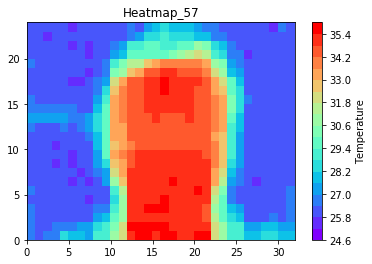

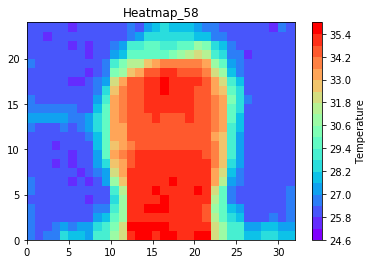

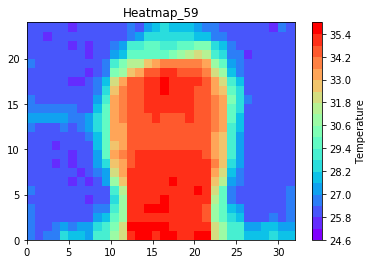

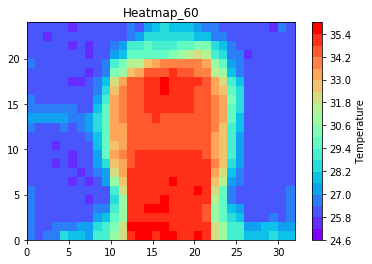

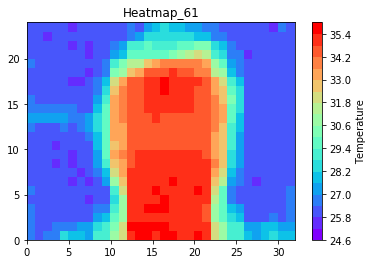

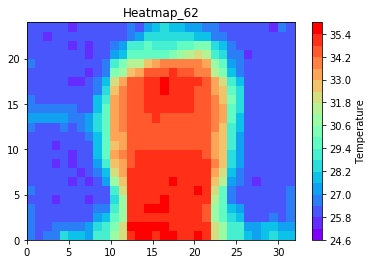

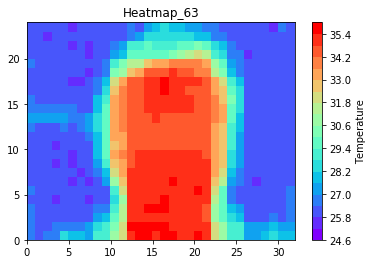

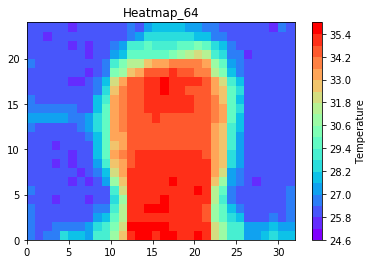

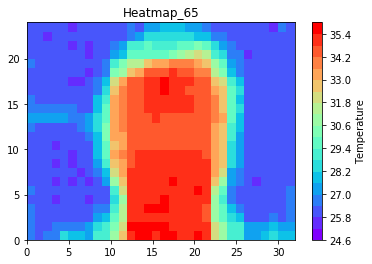

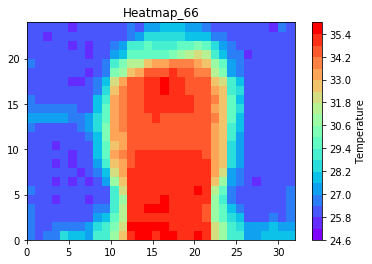

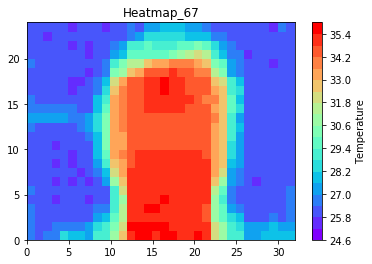

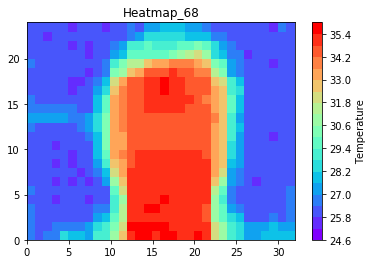

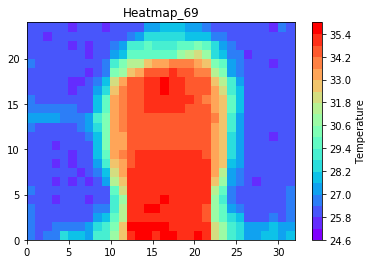

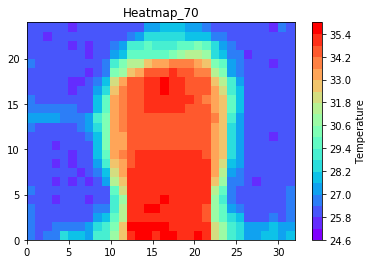

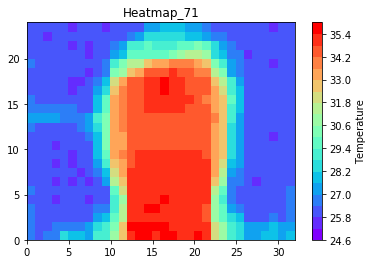

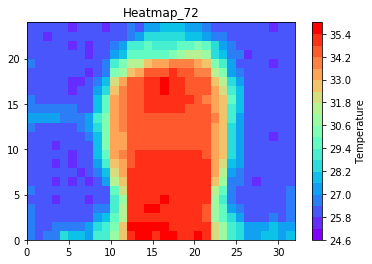

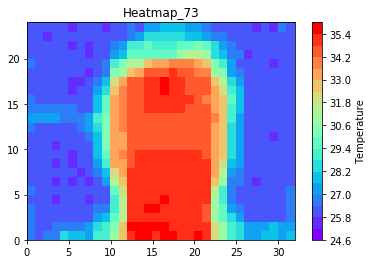

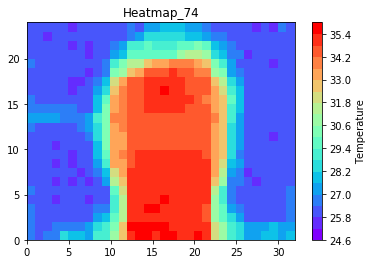

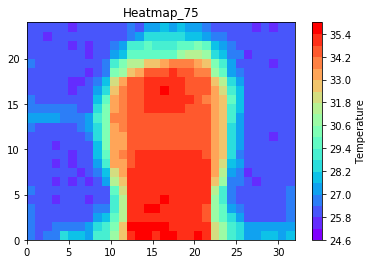

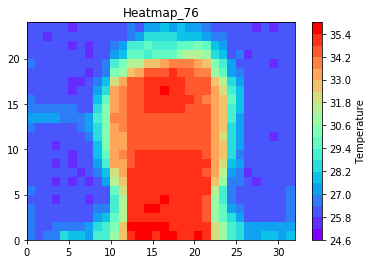

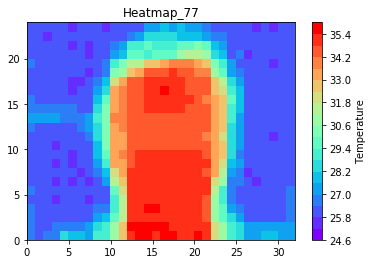

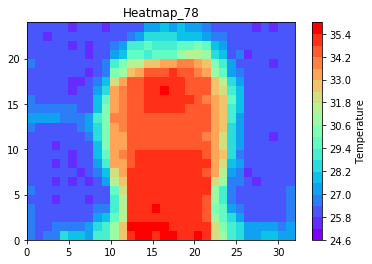

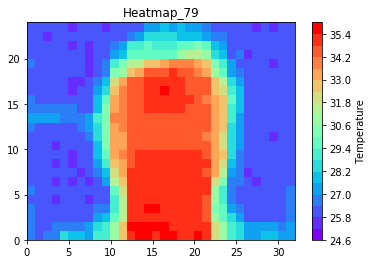

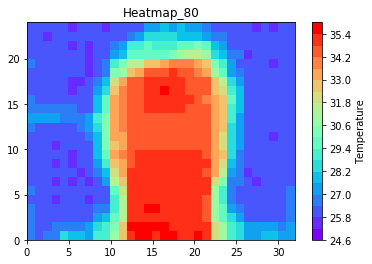

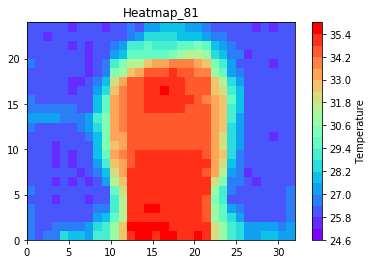

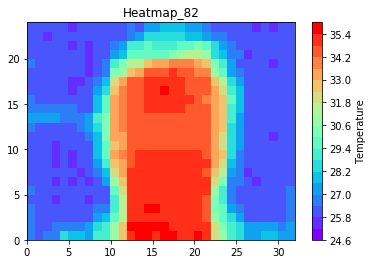

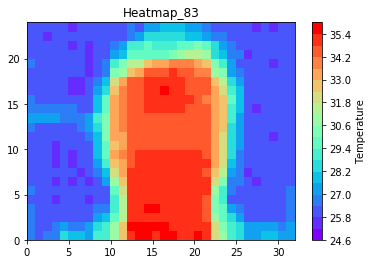

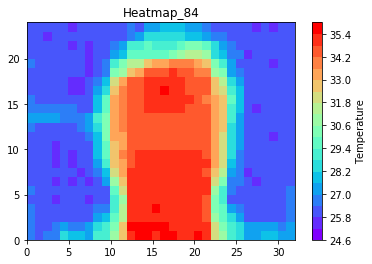

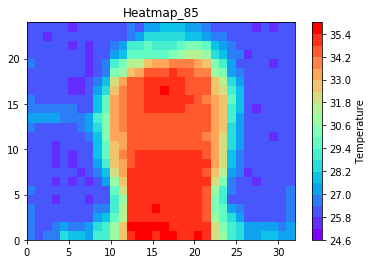

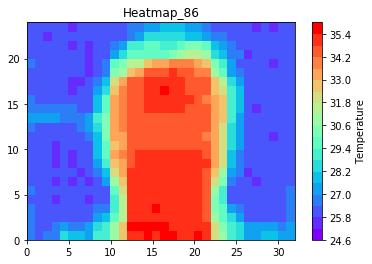

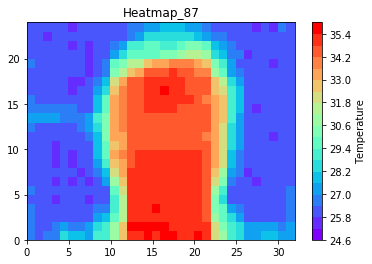

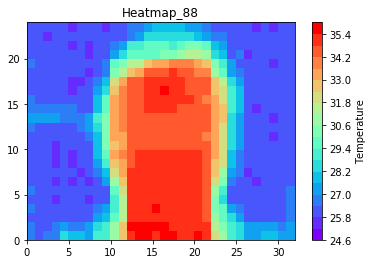

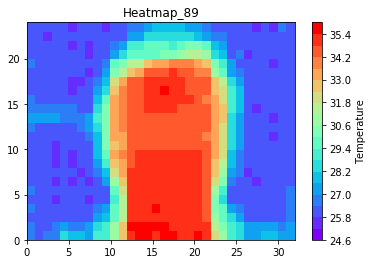

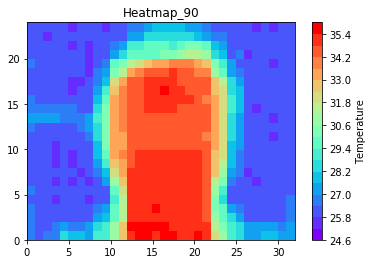

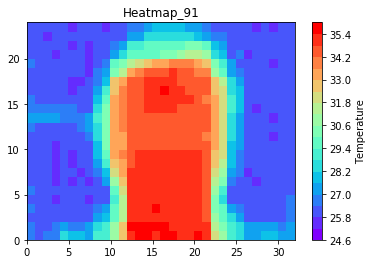

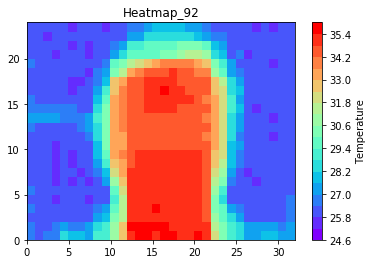

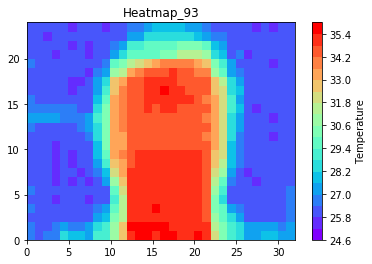

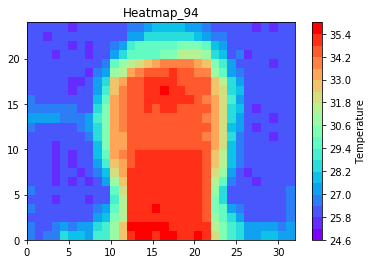

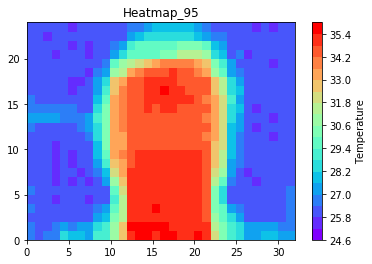

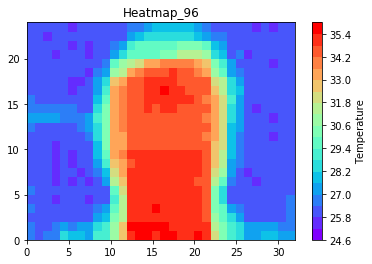

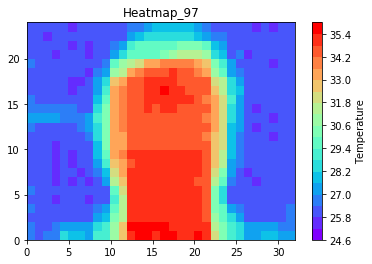

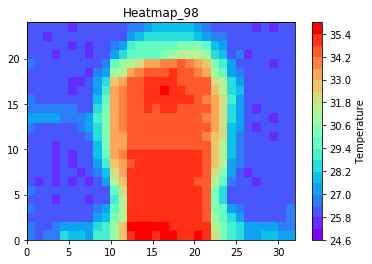

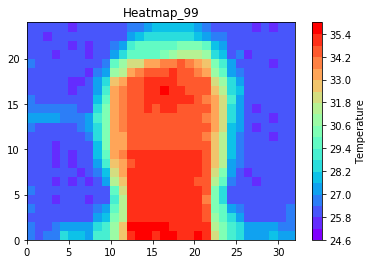

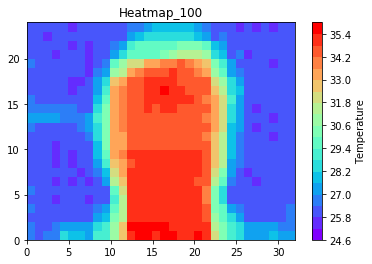

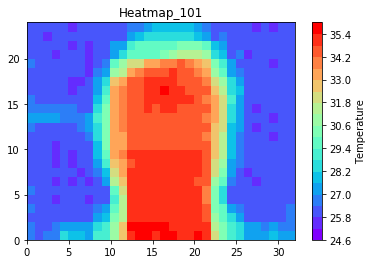

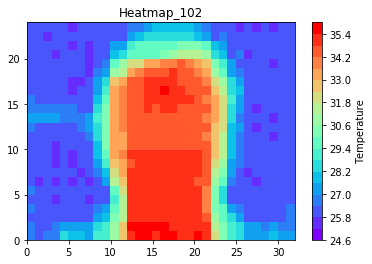

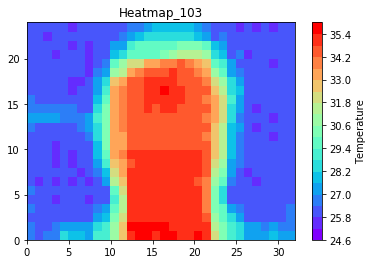

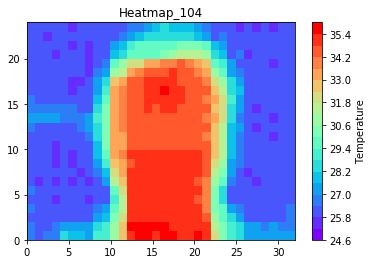

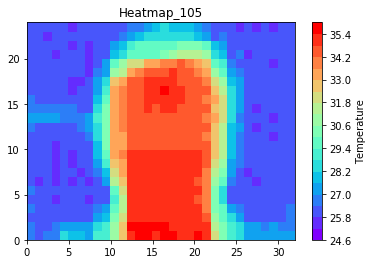

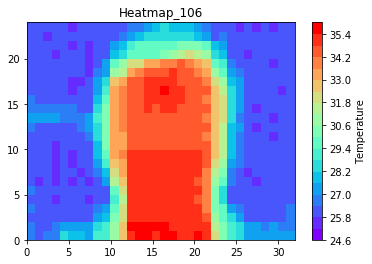

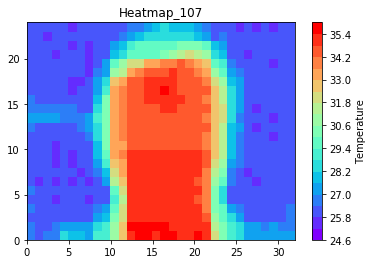

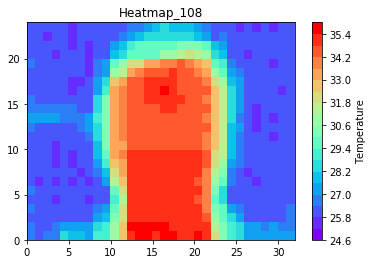

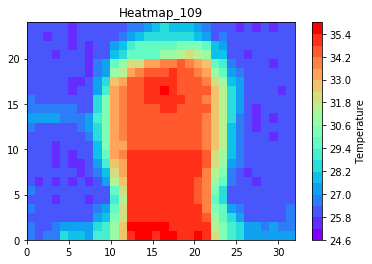

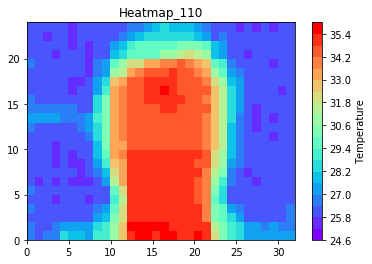

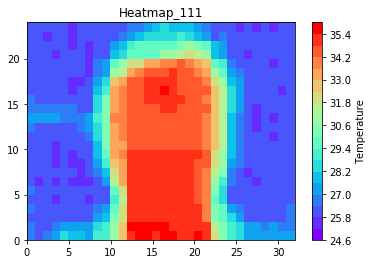

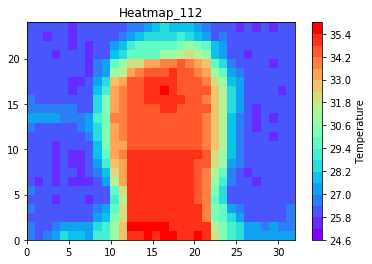

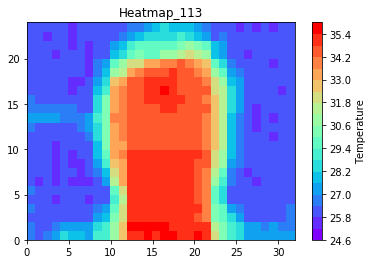

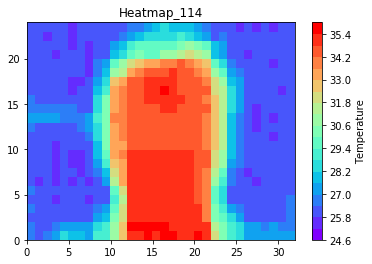

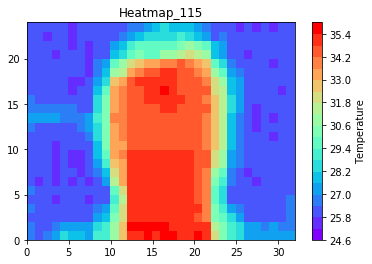

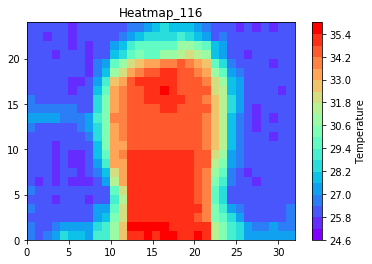

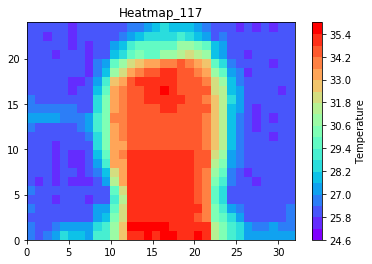

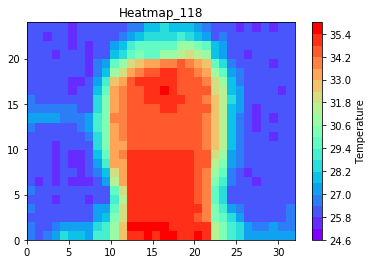

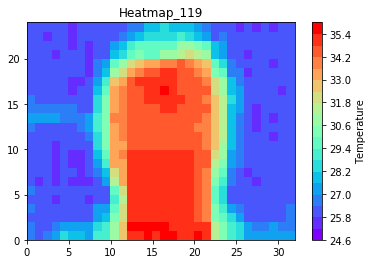

In [52]:
X, Y = np.meshgrid(np.linspace(0, 32, 33), np.linspace(0, 24, 25))
# tmp_all = np.zeros([24, 32])
p = 3
tmp_all = np.zeros([24, 32])
for l in range(df_temp.shape[0]):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24,先排列（从右到左），再排行（从下到上）
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1
            
        # 多帧相加
    tmp_all += temperature0

    tmp_ave = tmp_all / (l + 1)         
            
    fig = plt.figure()
    ax0 = fig.add_subplot(1, 1, 1)
    cmap=plt.get_cmap('rainbow')
#     levels = MaxNLocator(nbins=p).tick_values(temperature0.min(), temperature0.max())  # 分成binb
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    c = ax0.pcolormesh(X, Y, tmp_ave, cmap=cmap, norm=norm)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('Heatmap_{}'.format(p))
    # plt.savefig("I:\graduation\论文\images\heatmap3.png", dpi=200)
    plt.show()
    p += 1

# 伪彩色

In [107]:
import cv2
 
im_gray = cv2.imread("./images/color_modify/1.png", cv2.IMREAD_GRAYSCALE)
lis = ['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_BONE', 'COLORMAP_WINTER', 'COLORMAP_RAINBOW', 'COLORMAP_OCEAN', 
      'COLORMAP_SUMMER', 'COLORMAP_SPRING', 'COLORMAP_COOL', 'COLORMAP_PINK', 'COLORMAP_HSV', 'COLORMAP_HOT']

im_color = cv2.applyColorMap(im_gray, cv2.	COLORMAP_COOL)
# cv2.imshow('show', im_color)
cv2.imwrite(r"./images/color_modify/COLORMAP_COOL.png", im_color)
# cv2.waitKey(0)

True

In [90]:
i

'cv2.COLORMAP_AUTUMN'

In [59]:
help(cv2.applyColorMap)

Help on built-in function applyColorMap:

applyColorMap(...)
    applyColorMap(src, colormap[, dst]) -> dst
    .   @brief Applies a GNU Octave/MATLAB equivalent colormap on a given image.
    .   
    .   @param src The source image, grayscale or colored of type CV_8UC1 or CV_8UC3.
    .   @param dst The result is the colormapped source image. Note: Mat::create is called on dst.
    .   @param colormap The colormap to apply, see #ColormapTypes
    
    
    
    applyColorMap(src, userColor[, dst]) -> dst
    .   @brief Applies a user colormap on a given image.
    .   
    .   @param src The source image, grayscale or colored of type CV_8UC1 or CV_8UC3.
    .   @param dst The result is the colormapped source image. Note: Mat::create is called on dst.
    .   @param userColor The colormap to apply of type CV_8UC1 or CV_8UC3 and size 256

